In [ ]:
import pandas as pd
import numpy as np
import sklearn

In [ ]:
!python -m pip show scikit-learn

Name: scikit-learn
Version: 0.22.2.post1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /usr/local/lib/python3.6/dist-packages
Requires: scipy, numpy, joblib
Required-by: yellowbrick, umap-learn, textgenrnn, sklearn, sklearn-pandas, mlxtend, lucid, lightgbm, librosa, imbalanced-learn, fancyimpute


In [ ]:
#load dataset with pandas
msrm_df=pd.read_csv('/content/drive/MyDrive/Ai-datasets/mushroom edibility classification dataset.csv')
msrm_df.head()

,Unnamed: 0,class,cap-shape,cap-surface,cap-color,bruises,odor,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,poisonous,5.0,2,4.0,bruises is there,6,0,3,2,2,7,7,0,2,1,4,2,3,5
1,1,edible,5.0,2,9.0,bruises is there,0,0,2,2,2,7,7,0,2,1,4,3,2,1
2,2,edible,0.0,2,8.0,bruises is there,3,0,2,2,2,7,7,0,2,1,4,3,2,3
3,3,poisonous,5.0,3,8.0,bruises is there,6,0,3,2,2,7,7,0,2,1,4,2,3,5
4,4,edible,5.0,2,3.0,no bruises,5,1,3,2,2,7,7,0,2,1,0,3,0,1


In [ ]:
msrm_df.shape

(3124, 20)

In [ ]:
#handling missing values
msrm_df.isnull().sum()

Unnamed: 0                  0
class                       0
cap-shape                   8
cap-surface                 0
cap-color                   8
bruises                     0
odor                        0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
impute.fit(msrm_df[['cap-shape']])
msrm_df['cap-shape']=impute.transform(msrm_df[['cap-shape']])

In [ ]:
impute.fit(msrm_df[['cap-color']])
msrm_df['cap-color']=impute.transform(msrm_df[['cap-color']])

In [ ]:
msrm_df.isnull().sum()

Unnamed: 0                  0
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
# Encoding categorical features
msrm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3124 entries, 0 to 3123
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                3124 non-null   int64  
 1   class                     3124 non-null   object 
 2   cap-shape                 3124 non-null   float64
 3   cap-surface               3124 non-null   int64  
 4   cap-color                 3124 non-null   float64
 5   bruises                   3124 non-null   object 
 6   odor                      3124 non-null   int64  
 7   stalk-shape               3124 non-null   int64  
 8   stalk-root                3124 non-null   int64  
 9   stalk-surface-above-ring  3124 non-null   int64  
 10  stalk-surface-below-ring  3124 non-null   int64  
 11  stalk-color-above-ring    3124 non-null   int64  
 12  stalk-color-below-ring    3124 non-null   int64  
 13  veil-type                 3124 non-null   int64  
 14  veil-col

In [ ]:
msrm_df['bruises'].unique()

array(['bruises is there', 'no bruises'], dtype=object)

In [ ]:
msrm_df['bruises']=msrm_df['bruises'].map({'bruises is there':1, 'no bruises':0})

In [ ]:
msrm_df['class'].unique()

array(['poisonous', 'edible'], dtype=object)

In [ ]:
msrm_df['class']=msrm_df['class'].map({'poisonous':0, 'edible':1})

In [ ]:
msrm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3124 entries, 0 to 3123
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                3124 non-null   int64  
 1   class                     3124 non-null   int64  
 2   cap-shape                 3124 non-null   float64
 3   cap-surface               3124 non-null   int64  
 4   cap-color                 3124 non-null   float64
 5   bruises                   3124 non-null   int64  
 6   odor                      3124 non-null   int64  
 7   stalk-shape               3124 non-null   int64  
 8   stalk-root                3124 non-null   int64  
 9   stalk-surface-above-ring  3124 non-null   int64  
 10  stalk-surface-below-ring  3124 non-null   int64  
 11  stalk-color-above-ring    3124 non-null   int64  
 12  stalk-color-below-ring    3124 non-null   int64  
 13  veil-type                 3124 non-null   int64  
 14  veil-col

In [ ]:
msrm_df['ring-number'].unique()

array([1])

In [ ]:
msrm_df.drop(['ring-number'], axis=1, inplace=True)
msrm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3124 entries, 0 to 3123
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                3124 non-null   int64  
 1   class                     3124 non-null   int64  
 2   cap-shape                 3124 non-null   float64
 3   cap-surface               3124 non-null   int64  
 4   cap-color                 3124 non-null   float64
 5   bruises                   3124 non-null   int64  
 6   odor                      3124 non-null   int64  
 7   stalk-shape               3124 non-null   int64  
 8   stalk-root                3124 non-null   int64  
 9   stalk-surface-above-ring  3124 non-null   int64  
 10  stalk-surface-below-ring  3124 non-null   int64  
 11  stalk-color-above-ring    3124 non-null   int64  
 12  stalk-color-below-ring    3124 non-null   int64  
 13  veil-type                 3124 non-null   int64  
 14  veil-col

In [ ]:
msrm_df['veil-color'].unique()

array([2])

In [ ]:
msrm_df.drop(['veil-color'], axis=1, inplace=True)
msrm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3124 entries, 0 to 3123
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                3124 non-null   int64  
 1   class                     3124 non-null   int64  
 2   cap-shape                 3124 non-null   float64
 3   cap-surface               3124 non-null   int64  
 4   cap-color                 3124 non-null   float64
 5   bruises                   3124 non-null   int64  
 6   odor                      3124 non-null   int64  
 7   stalk-shape               3124 non-null   int64  
 8   stalk-root                3124 non-null   int64  
 9   stalk-surface-above-ring  3124 non-null   int64  
 10  stalk-surface-below-ring  3124 non-null   int64  
 11  stalk-color-above-ring    3124 non-null   int64  
 12  stalk-color-below-ring    3124 non-null   int64  
 13  veil-type                 3124 non-null   int64  
 14  ring-typ

In [ ]:
msrm_df['veil-type'].unique()

array([0])

In [ ]:
msrm_df.drop(['veil-type'], axis=1, inplace=True)
msrm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3124 entries, 0 to 3123
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                3124 non-null   int64  
 1   class                     3124 non-null   int64  
 2   cap-shape                 3124 non-null   float64
 3   cap-surface               3124 non-null   int64  
 4   cap-color                 3124 non-null   float64
 5   bruises                   3124 non-null   int64  
 6   odor                      3124 non-null   int64  
 7   stalk-shape               3124 non-null   int64  
 8   stalk-root                3124 non-null   int64  
 9   stalk-surface-above-ring  3124 non-null   int64  
 10  stalk-surface-below-ring  3124 non-null   int64  
 11  stalk-color-above-ring    3124 non-null   int64  
 12  stalk-color-below-ring    3124 non-null   int64  
 13  ring-type                 3124 non-null   int64  
 14  spore-pr

In [ ]:
msrm_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
#SVM
msrm_df_svm=msrm_df
msrm_df_svm.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population,habitat
0,0,5.0,2,4.0,1,6,0,3,2,2,7,7,4,2,3,5
1,1,5.0,2,9.0,1,0,0,2,2,2,7,7,4,3,2,1
2,1,0.0,2,8.0,1,3,0,2,2,2,7,7,4,3,2,3
3,0,5.0,3,8.0,1,6,0,3,2,2,7,7,4,2,3,5
4,1,5.0,2,3.0,0,5,1,3,2,2,7,7,0,3,0,1


In [ ]:
Y=msrm_df_svm.iloc[:,0] #target values
X=msrm_df_svm.iloc[:,1:16] #feature values
print(Y.head())
print(X.head())

0    0
1    1
2    1
3    0
4    1
Name: class, dtype: int64
   cap-shape  cap-surface  cap-color  ...  spore-print-color  population  habitat
0        5.0            2        4.0  ...                  2           3        5
1        5.0            2        9.0  ...                  3           2        1
2        0.0            2        8.0  ...                  3           2        3
3        5.0            3        8.0  ...                  2           3        5
4        5.0            2        3.0  ...                  3           0        1

[5 rows x 15 columns]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pre_SVM_train=round(svc.score(x_train, y_train),2)
pre_SVM_test=round(svc.score(x_test, y_test),2)
print("Training Accuracy of the SVM model is: ",pre_SVM_train)
print("Testing Accuracy of the SVM model is: ",pre_SVM_test)

Training Accuracy of the SVM model is:  0.99
Testing Accuracy of the SVM model is:  0.99


In [ ]:
predictions = svc.predict(x_test)
print(predictions)

[0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 0 1 

In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, y_test)
print(mat)

[[ 62   0]
 [  4 559]]


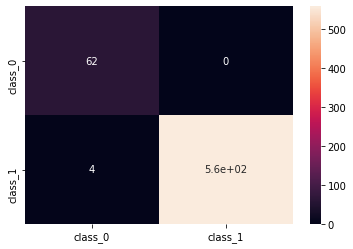

In [ ]:
from seaborn import heatmap
heatmap(mat, xticklabels=['class_0','class_1'], yticklabels=['class_0','class_1'], annot=True)

In [ ]:
#random Forest
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=60)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pre_RFC_train=round(rfc.score(x_train, y_train),2)
pre_RFC_test=round(rfc.score(x_test, y_test),2)
print("Training Accuracy of the RFC model is: ",pre_RFC_train)
print("Testing Accuracy of the RFC model is: ",pre_RFC_test)

Training Accuracy of the RFC model is:  1.0
Testing Accuracy of the RFC model is:  1.0


In [ ]:
predictions=rfc.predict(x_test)

[[ 66   0]
 [  0 559]]


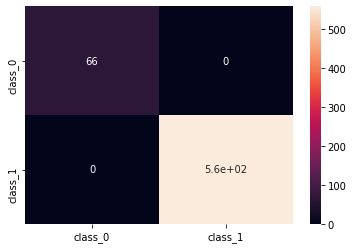

In [ ]:
mat=confusion_matrix(predictions, y_test)
print(mat)
from seaborn import heatmap
heatmap(mat, xticklabels=['class_0','class_1'], yticklabels=['class_0','class_1'], annot=True)

In [ ]:
#neural network

from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(5), activation="relu", max_iter=1000)

nnc.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=5, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
pre_NNC_train=round(nnc.score(x_train, y_train),2)
pre_NNC_test=round(nnc.score(x_test, y_test),2)
print("Training Accuracy of the NNC model is: ",pre_NNC_train)
print("Testing Accuracy of the NNC model is: ",pre_NNC_test)

Training Accuracy of the NNC model is:  1.0
Testing Accuracy of the NNC model is:  1.0


In [ ]:
predictions=nnc.predict(x_test)
print(predictions)

[0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 0 1 

[[ 66   0]
 [  0 559]]


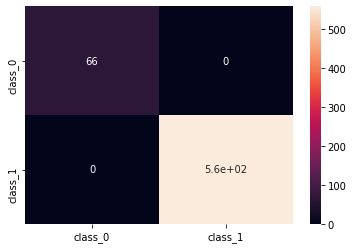

In [ ]:
mat=confusion_matrix(predictions, y_test)
print(mat)
from seaborn import heatmap
heatmap(mat, xticklabels=['class_0','class_1'], yticklabels=['class_0','class_1'], annot=True)

In [ ]:
msrm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3124 entries, 0 to 3123
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   class                     3124 non-null   int64  
 1   cap-shape                 3124 non-null   float64
 2   cap-surface               3124 non-null   int64  
 3   cap-color                 3124 non-null   float64
 4   bruises                   3124 non-null   int64  
 5   odor                      3124 non-null   int64  
 6   stalk-shape               3124 non-null   int64  
 7   stalk-root                3124 non-null   int64  
 8   stalk-surface-above-ring  3124 non-null   int64  
 9   stalk-surface-below-ring  3124 non-null   int64  
 10  stalk-color-above-ring    3124 non-null   int64  
 11  stalk-color-below-ring    3124 non-null   int64  
 12  ring-type                 3124 non-null   int64  
 13  spore-print-color         3124 non-null   int64  
 14  populati

In [ ]:
#dimentionality Reduction
from sklearn.decomposition import PCA
pca= PCA(n_components=7)


In [ ]:
principal_components=pca.fit_transform(msrm_df)
print(principal_components)

[[-0.27600692  0.45851878 -1.50669147 ... -0.51067579  0.77617839
   0.76029006]
 [ 4.7259875  -2.08529414 -2.26840403 ...  1.2610784   0.2307582
  -0.36999098]
 [ 4.42298882 -0.8198611   2.77978448 ... -0.42576025  0.20770395
   0.3147105 ]
 ...
 [-2.86684772 -1.86818978  2.13784842 ... -0.18540942 -1.44491361
   0.82079908]
 [-4.16253897 -1.70007513 -0.30134407 ...  1.51405611  3.04160701
   3.51736116]
 [-4.03768803 -1.33213665 -0.64551909 ...  0.47351646 -1.65573773
   1.07090222]]


In [ ]:
principal_df=pd.DataFrame(data=principal_components, columns=['comp 1', 'comp 2','comp 3','comp 4','comp 5','comp 6','comp 7'])
reduced_df=pd.concat([principal_df, msrm_df[['class']]],axis=1)


In [ ]:
reduced_df.head()

,comp 1,comp 2,comp 3,comp 4,comp 5,comp 6,comp 7,class
0,-0.276007,0.458519,-1.506691,4.533523,-0.510676,0.776178,0.760290,0
1,4.725987,-2.085294,-2.268404,-2.066984,1.261078,0.230758,-0.369991,1
2,4.422989,-0.819861,2.779784,0.727520,-0.425760,0.207704,0.314710,1
3,2.800681,-0.271528,-2.191530,3.564118,-2.678852,0.363342,1.356245,0
4,-0.807009,4.406493,-1.407628,0.117743,1.524267,-1.231956,0.572764,1


In [ ]:
# applying svm, MLP and RFC again with reduced df
Y=reduced_df.iloc[:,7] #target values
X=reduced_df.iloc[:,0:6] #feature values
print(Y.head())
print(X.head())

0    0
1    1
2    1
3    0
4    1
Name: class, dtype: int64
     comp 1    comp 2    comp 3    comp 4    comp 5    comp 6
0 -0.276007  0.458519 -1.506691  4.533523 -0.510676  0.776178
1  4.725987 -2.085294 -2.268404 -2.066984  1.261078  0.230758
2  4.422989 -0.819861  2.779784  0.727520 -0.425760  0.207704
3  2.800681 -0.271528 -2.191530  3.564118 -2.678852  0.363342
4 -0.807009  4.406493 -1.407628  0.117743  1.524267 -1.231956


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [ ]:
svc.fit(x_train, y_train)

post_SVM_train=round(svc.score(x_train, y_train),2)
post_SVM_test=round(svc.score(x_test, y_test),2)
print("Training Accuracy of the SVM model is: ",post_SVM_train)
print("Testing Accuracy of the SVM model is: ",post_SVM_test)

Training Accuracy of the SVM model is:  0.95
Testing Accuracy of the SVM model is:  0.96


In [ ]:
rfc.fit(x_train, y_train)

post_RFC_train=round(rfc.score(x_train, y_train),2)
post_RFC_test=round(rfc.score(x_test, y_test),2)
print("Training Accuracy of the RFC model is: ",post_RFC_train)
print("Testing Accuracy of the RFC model is: ",post_RFC_test)

Training Accuracy of the RFC model is:  1.0
Testing Accuracy of the RFC model is:  1.0


In [ ]:
nnc.fit(x_train, y_train)
post_NNC_train=round(nnc.score(x_train, y_train),2)
post_NNC_test=round(nnc.score(x_test, y_test),2)
print("Training Accuracy of the NNC model is: ",post_NNC_train)
print("Testing Accuracy of the NNC model is: ",post_NNC_test)

Training Accuracy of the NNC model is:  0.99
Testing Accuracy of the NNC model is:  1.0


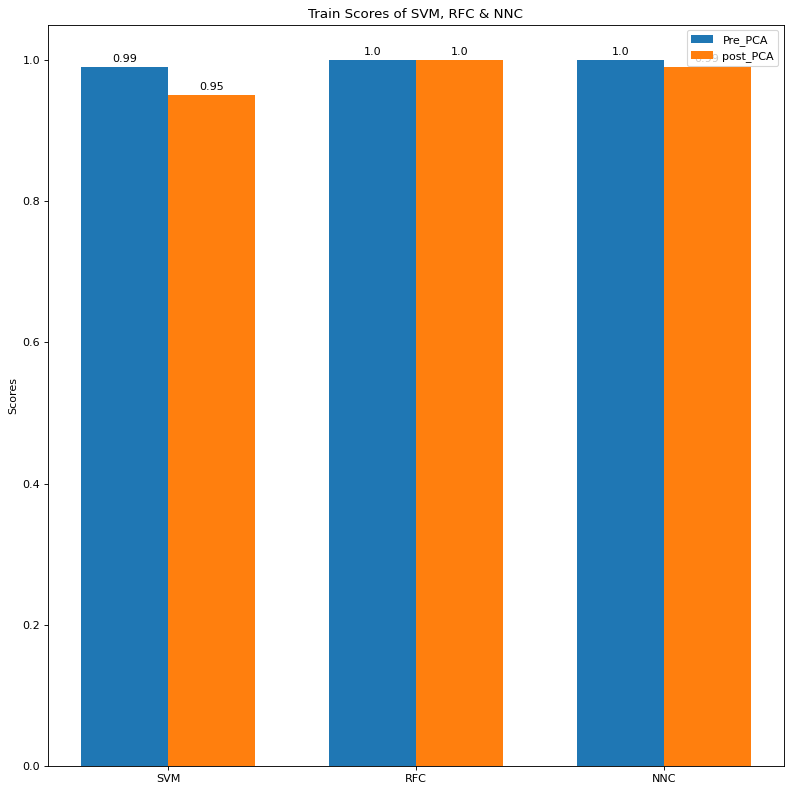

In [ ]:
#train accuracy compare
labels = ['SVM', 'RFC', 'NNC']
pre_pca = [pre_SVM_train, pre_RFC_train, pre_NNC_train,]
post_pca = [post_SVM_train, post_RFC_train, post_NNC_train,]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (10,10), dpi=80)
rects1 = ax.bar(x - width/2, pre_pca, width, label='Pre_PCA')
rects2 = ax.bar(x + width/2, post_pca, width, label='post_PCA')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Train Scores of SVM, RFC & NNC')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

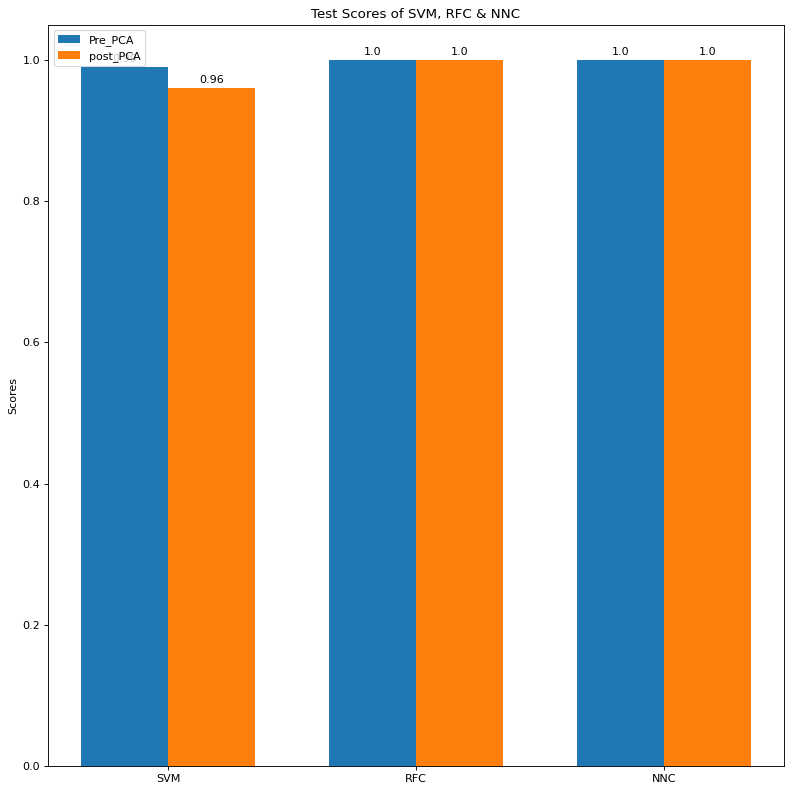

In [ ]:
#test accuracy compare
labels = ['SVM', 'RFC', 'NNC']
pre_pca = [pre_SVM_test, pre_RFC_test, pre_NNC_test,]
post_pca = [post_SVM_test, post_RFC_test, post_NNC_test,]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (10,10), dpi=80)
rects1 = ax.bar(x - width/2, pre_pca, width, label='Pre_PCA')
rects2 = ax.bar(x + width/2, post_pca, width, label='post_PCA')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Test Scores of SVM, RFC & NNC')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()